# HR Analytics: Attfiction & Churn Analysis

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

Matplotlib is building the font cache; this may take a moment.


## Preprocessing

Load dataset

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Check data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Data shape

In [8]:
data.shape

(1470, 35)

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Check duplicates

In [11]:
data.duplicated().value_counts()

False    1470
dtype: int64

## Data cleansing: HAndle Outlier

Identify Outlier

1) BoxPlot

In [13]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['MonthlyIncome'])

Outliers: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]


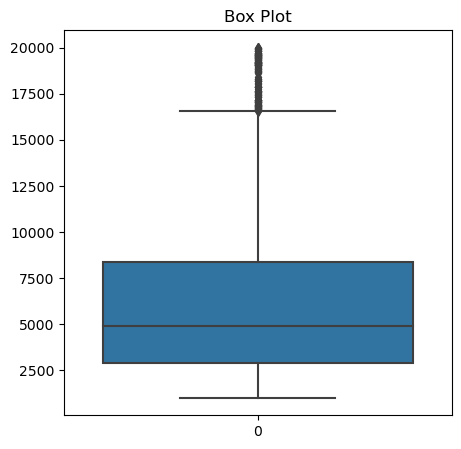

In [14]:
def Box_plots(df):
    plt.figure(figsize=(5, 5))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(data['MonthlyIncome'])

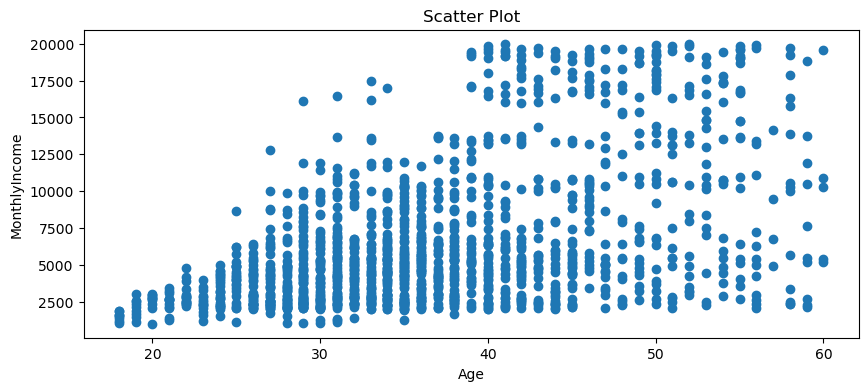

In [15]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('MonthlyIncome')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data['Age'],data['MonthlyIncome'])

C:\Users\LG\AppData\Local\Temp\ipykernel_31428\313817430.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


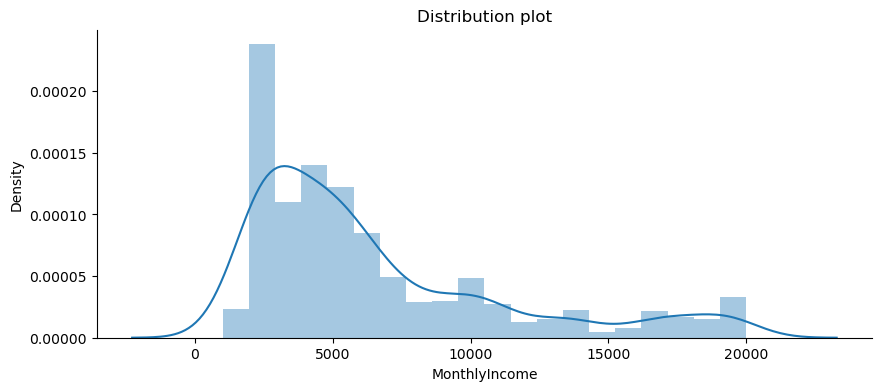

In [16]:
def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data['MonthlyIncome'])

In [17]:
df = data.copy()

#### Option 1) mean, std

In [18]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['MonthlyIncome'])

Outliers: []


#### Option 2) zscore library

In [20]:
from scipy import stats

# Calculating Z-scores for the 'Salary' column
df['Z_Score'] = stats.zscore(df['MonthlyIncome'])

df[['EmployeeNumber','MonthlyIncome','Z_Score']].head()

,EmployeeNumber,MonthlyIncome,Z_Score
0,1,5993,-0.108350
1,2,5130,-0.291719
2,4,2090,-0.937654
3,5,2909,-0.763634
4,7,3468,-0.644858


In [21]:
df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Z_Score


#### Option 3) zscore + np.abs

In [22]:
df[(np.abs(stats.zscore(df['MonthlyIncome'])) > 3)]  # Keep data with Z-score less than 3 ; abs:절대값

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Z_Score


Handle Outliers

1) Remove Outliers

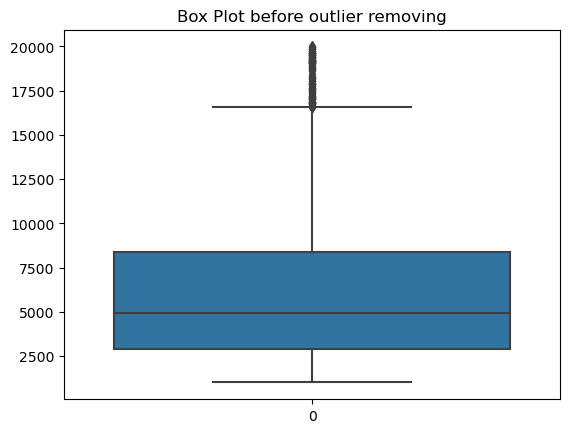

In [23]:
sns.boxplot(df['MonthlyIncome'])
plt.title("Box Plot before outlier removing")
plt.show()

In [24]:
# Calculating Q1 and Q3 for the 'Salary' column
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dropping outliers
df_no_outliers = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

print(df_no_outliers.shape)

(1356, 36)


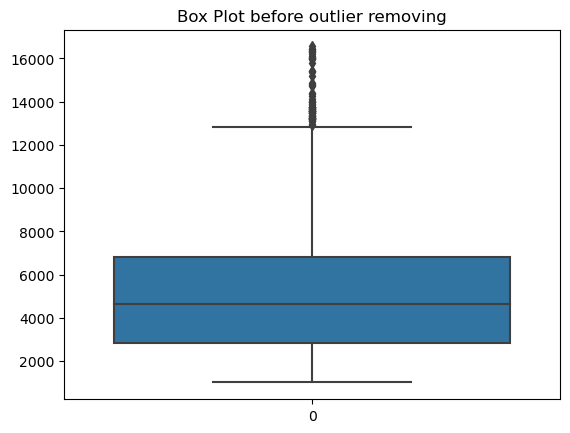

In [25]:
sns.boxplot(df_no_outliers['MonthlyIncome'])
plt.title("Box Plot before outlier removing")
plt.show()

2) Data Transformation

#### Scaling

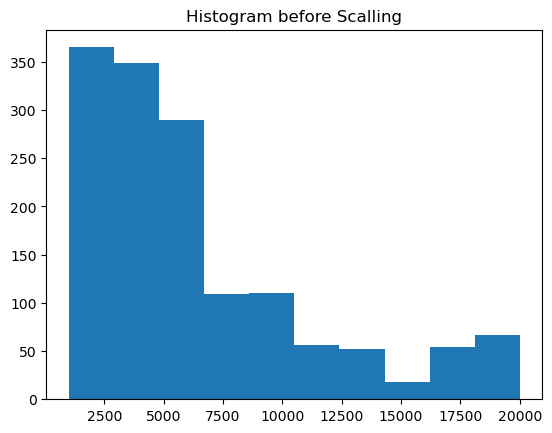

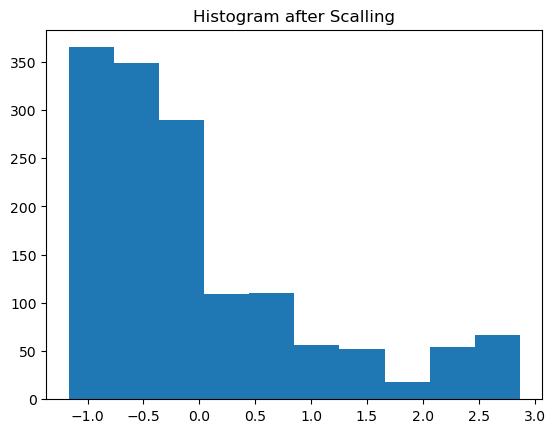

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

plt.hist(df['MonthlyIncome'])
plt.title("Histogram before Scalling")
plt.show()

scaler = preprocessing.StandardScaler()
df['MonthlyIncome_scale'] = scaler.fit_transform(df['MonthlyIncome'].values.reshape(-1,1))
plt.hist(df['MonthlyIncome_scale'])
plt.title("Histogram after Scalling")
plt.show()

C:\Users\LG\AppData\Local\Temp\ipykernel_31428\744296083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


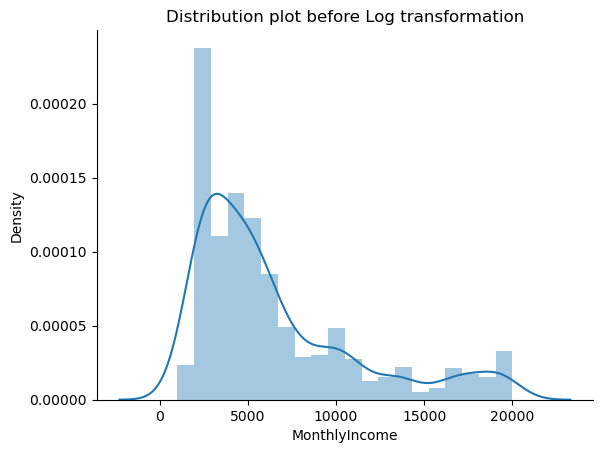

C:\Users\LG\AppData\Local\Temp\ipykernel_31428\744296083.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome_log'])


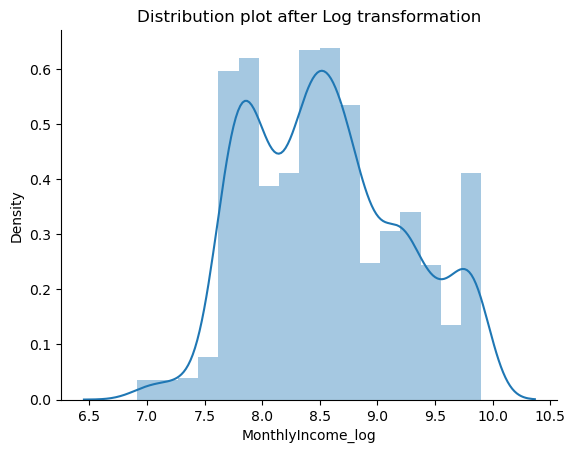

In [27]:
sns.distplot(df['MonthlyIncome'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()

df['MonthlyIncome_log'] = np.log(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome_log'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

3) Imputation

*similar to missing value, we can also impute outliers

#### Mean imputation

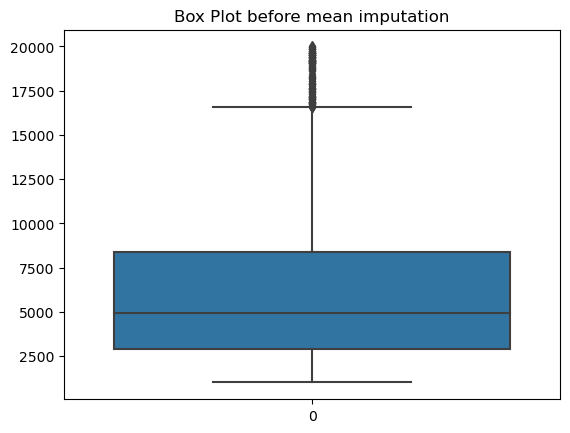

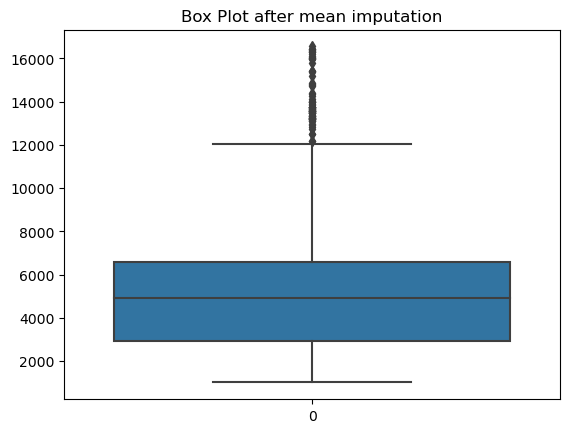

In [28]:
sns.boxplot(df['MonthlyIncome'])
plt.title("Box Plot before mean imputation")
plt.show()


q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['MonthlyIncome'])
for i in df['MonthlyIncome']:
    if i > Upper_tail or i < Lower_tail:
            df['MonthlyIncome'] = df['MonthlyIncome'].replace(i, m)
sns.boxplot(df['MonthlyIncome'])
plt.title("Box Plot after mean imputation")
plt.show()   

Feature Engineering


Numerical & Categorical variable

*datatype = integer, attribute = numerical feature

*datatype = string, attribute = categorical feature

In [29]:

numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy(deep = True)

Categorical variables


Encoding categorical variables


In [30]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 790.19it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [31]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k

C:\Users\LG\AppData\Local\Temp\ipykernel_31428\2431772760.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
C:\Users\LG\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\LG\AppData\Local\Temp\ipykernel_31428\2431772760.py:8: UserWarning: 

`distplot` is a deprecated function and will be remove

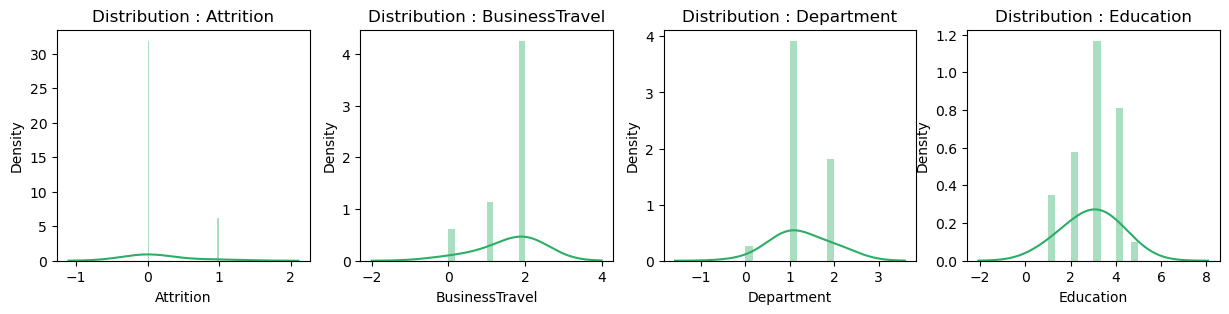

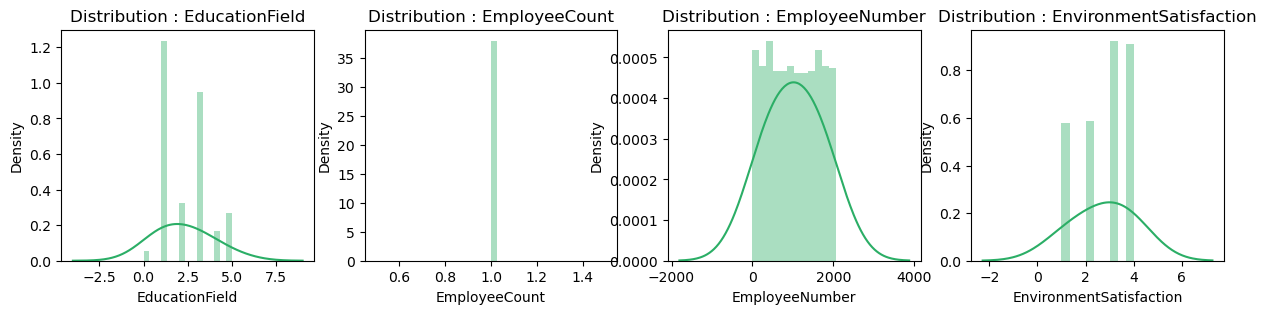

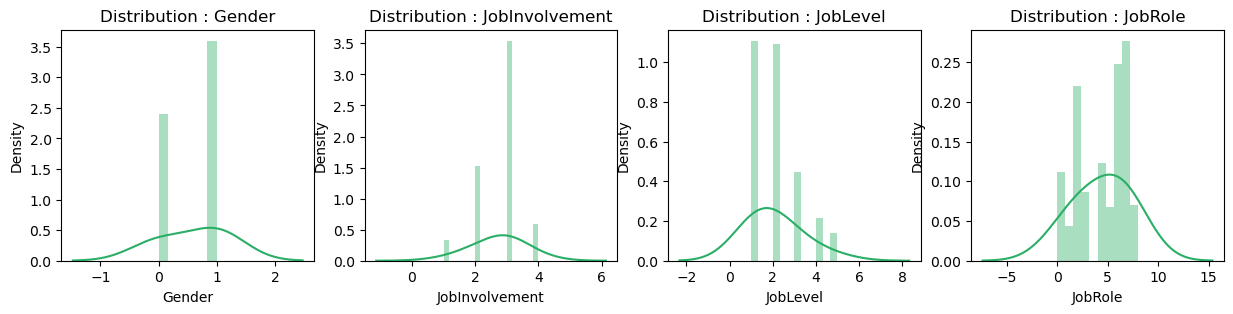

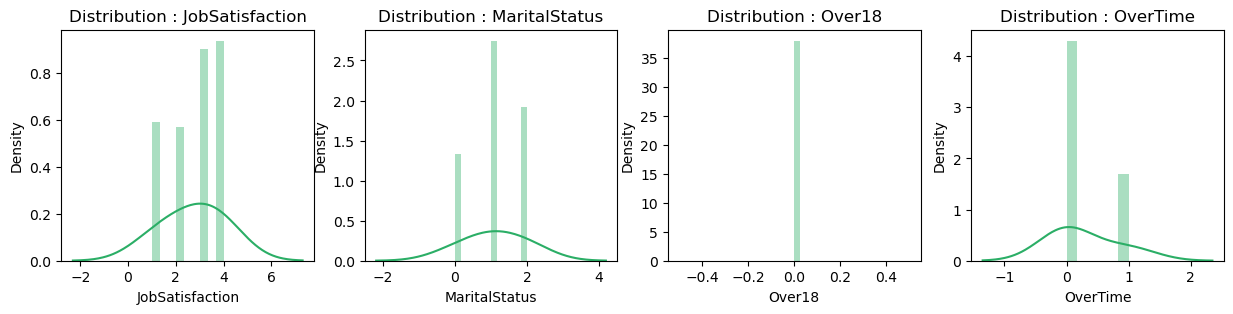

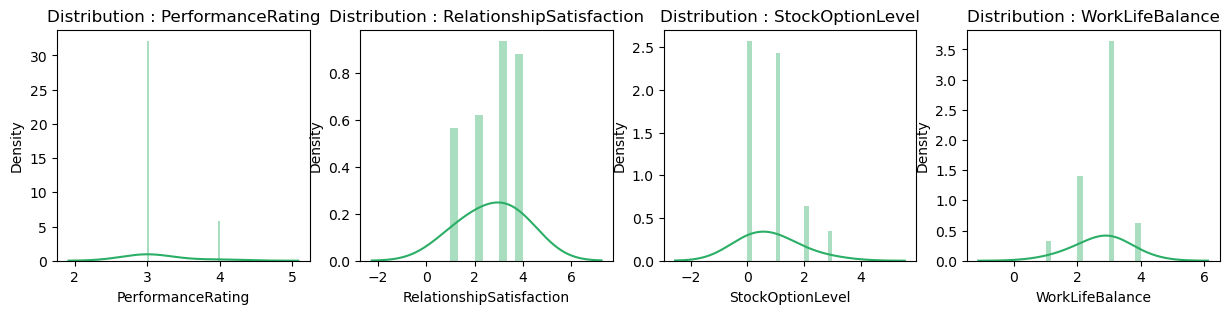

In [32]:
colors = ['#2BAE66','#FCF6F5']

for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

Drop Features from categorical variable

* 'Over18', & 'EmployeeCount' : Single value features

* 'EmployeeNumber': Unique number

* 'Attriction': Target variable

##### Numerical Features

C:\Users\LG\AppData\Local\Temp\ipykernel_31428\3011056126.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
C:\Users\LG\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\LG\AppData\Local\Temp\ipykernel_31428\3011056126.py:6: UserWarning: 

`distplot` is a deprecated function and will be remove

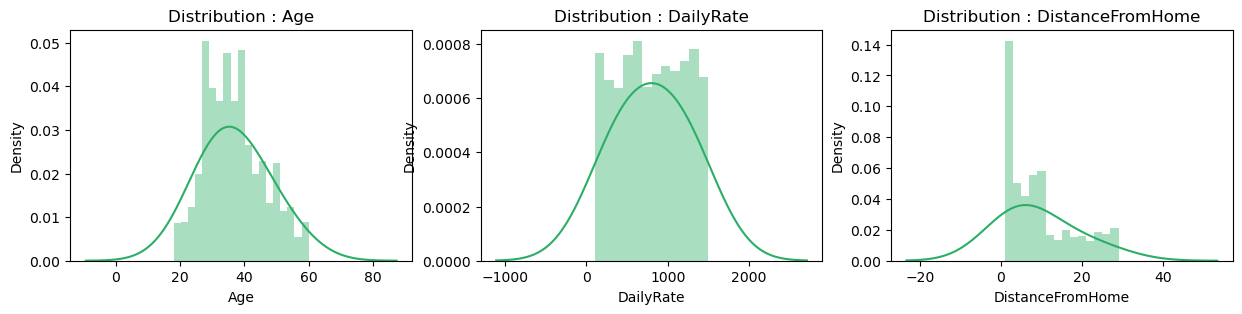

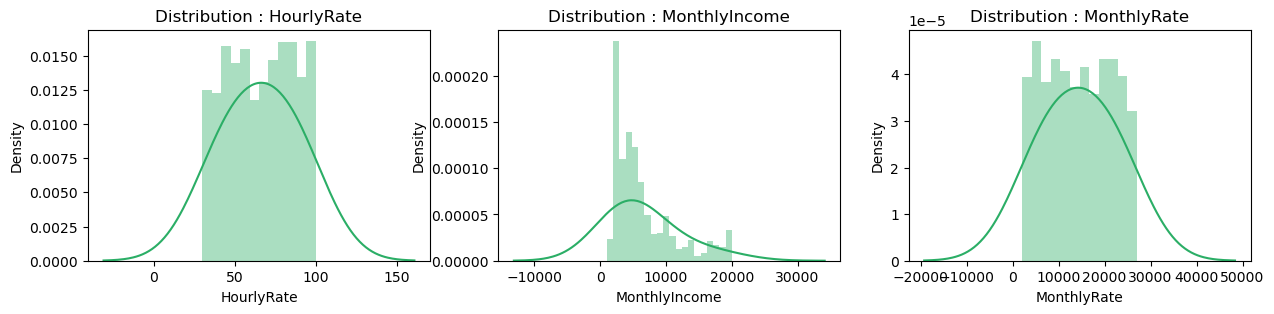

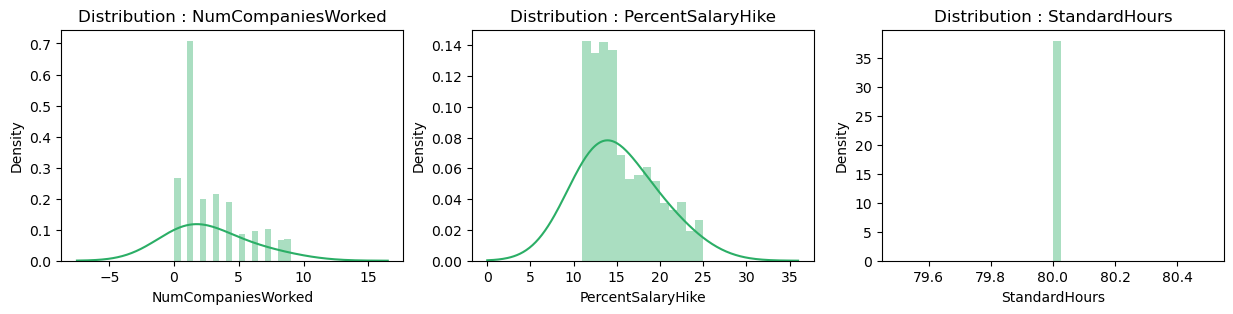

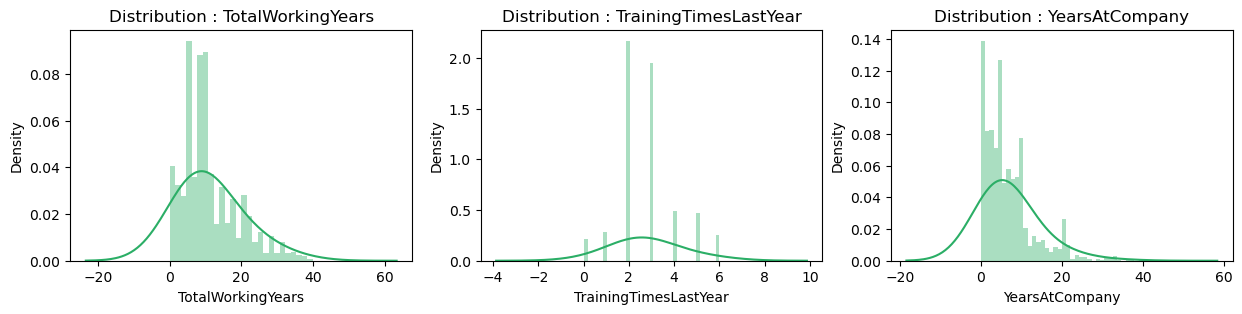

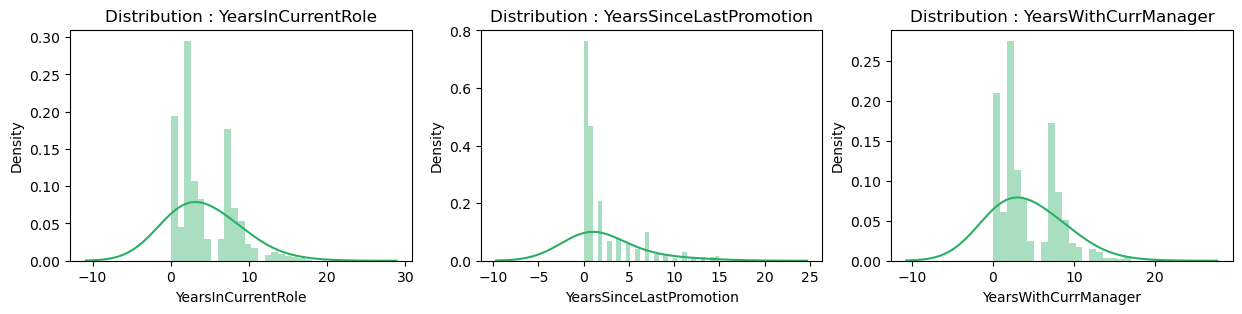

In [34]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in numerical_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

##### Drop Features from numerical features

In [35]:
df1.drop(columns = ['StandardHours'], inplace = True)
numerical_features.remove('StandardHours')

In [36]:
df1['Attrition'].unique()


array([1, 0])

In [37]:
tf1


{'Attrition': {1: 'Yes', 0: 'No'},
 'BusinessTravel': {2: 'Travel_Rarely',
  1: 'Travel_Frequently',
  0: 'Non-Travel'},
 'Department': {2: 'Sales', 1: 'Research & Development', 0: 'Human Resources'},
 'EducationField': {1: 'Life Sciences',
  4: 'Other',
  3: 'Medical',
  2: 'Marketing',
  5: 'Technical Degree',
  0: 'Human Resources'},
 'Gender': {0: 'Female', 1: 'Male'},
 'JobRole': {7: 'Sales Executive',
  6: 'Research Scientist',
  2: 'Laboratory Technician',
  4: 'Manufacturing Director',
  0: 'Healthcare Representative',
  3: 'Manager',
  8: 'Sales Representative',
  5: 'Research Director',
  1: 'Human Resources'},
 'MaritalStatus': {2: 'Single', 1: 'Married', 0: 'Divorced'},
 'Over18': {0: 'Y'},
 'OverTime': {1: 'Yes', 0: 'No'}}

In [38]:
print(tf1['Attrition'])

{1: 'Yes', 0: 'No'}


In [39]:
list(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique()))

['No', 'Yes']

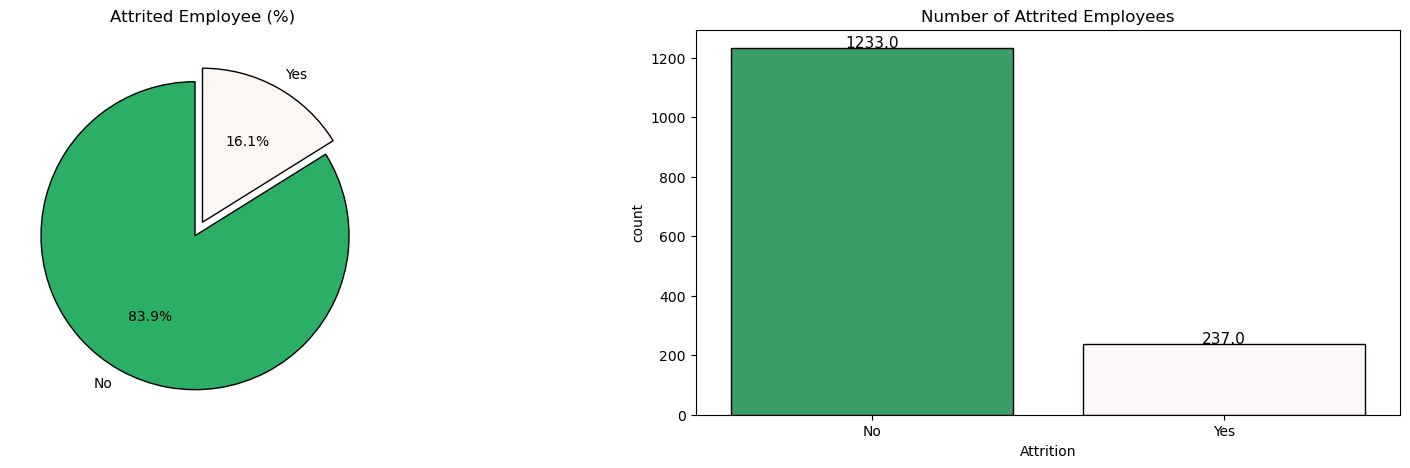

In [40]:
l = list(df1['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,
        # labels = list(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique())),
        labels=[tf1['Attrition'].get(j, j) for j in sorted(df1['Attrition'].unique())],
        autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Attrited Employee (%)')

plt.subplot(1,2,2)
# ax = sns.countplot('Attrition',data = df1, palette = colors,edgecolor = 'black')
ax = sns.countplot(x='Attrition', data=df1, palette=colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
# ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique()))
ax.set_xticklabels([tf1['Attrition'].get(j, j) for j in sorted(df1['Attrition'].unique())])
plt.title('Number of Attrited Employees')
plt.show()

## Handling Imbalanced Data: SMOTE

In [41]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [43]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [44]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

Data Splitting

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [46]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

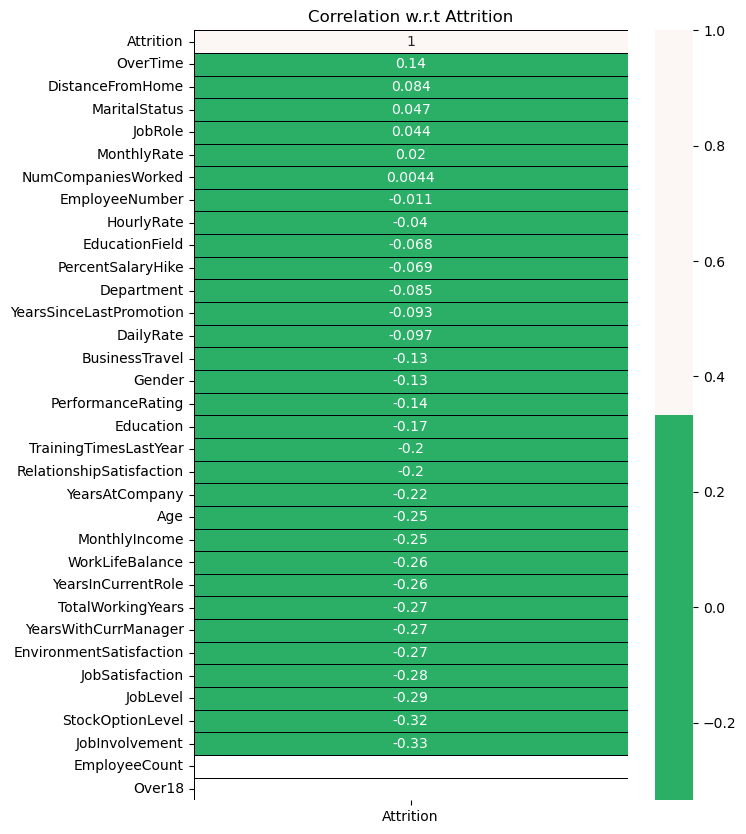

In [47]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

## Feature Selection

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

Chi Squared Test

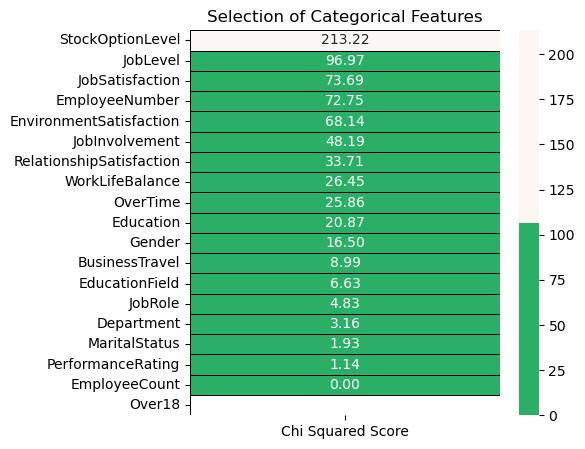

In [49]:
features = x_train.loc[:,categorical_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Observation

* Drop: PerformanceRating, Department, JobRole, EducationField, BusinessTravel, MaritalStatus & Gender

## ANOVA Test

C:\Users\LG\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


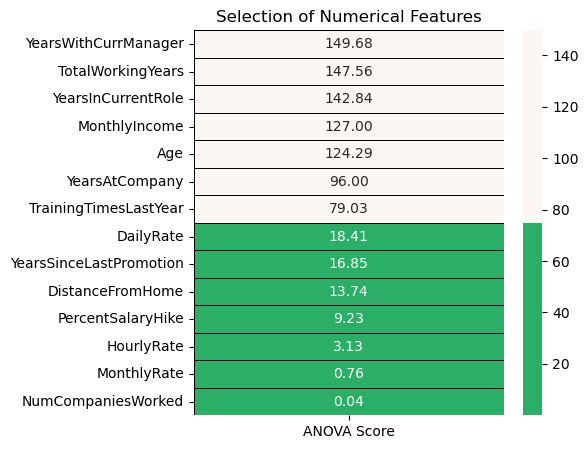

In [50]:
from sklearn.feature_selection import f_classif

features = x_train.loc[:,numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Observation

* drop the following features : MonthlyRate, HourlyRate, NumCompaniesWorked, PercentSalaryHike, YearsSinceLastPromotion, DistanceFromHome & DailyRate.


In [51]:
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

## Data Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['MonthlyIncome'] = mms.fit_transform(x_train[['MonthlyIncome']]); x_test['MonthlyIncome'] = mms.transform(x_test[['MonthlyIncome']])
x_train['TotalWorkingYears'] = mms.fit_transform(x_train[['TotalWorkingYears']]); x_test['TotalWorkingYears'] = mms.transform(x_test[['TotalWorkingYears']])
x_train['YearsAtCompany'] = mms.fit_transform(x_train[['YearsAtCompany']]); x_test['YearsAtCompany'] = mms.transform(x_test[['YearsAtCompany']])
x_train['YearsInCurrentRole'] = mms.fit_transform(x_train[['YearsInCurrentRole']]); x_test['YearsInCurrentRole'] = mms.transform(x_test[['YearsInCurrentRole']])
x_train['YearsWithCurrManager'] = mms.fit_transform(x_train[['YearsWithCurrManager']]); x_test['YearsWithCurrManager'] = mms.transform(x_test[['YearsWithCurrManager']])

# Standardization
x_train['Age'] = ss.fit_transform(x_train[['Age']]); x_test['Age'] = ss.transform(x_test[['Age']])
x_train['Education'] = ss.fit_transform(x_train[['Education']]); x_test['Education'] = ss.transform(x_test[['Education']])
x_train['EnvironmentSatisfaction'] = ss.fit_transform(x_train[['EnvironmentSatisfaction']]); x_test['EnvironmentSatisfaction'] = ss.transform(x_test[['EnvironmentSatisfaction']])
x_train['JobInvolvement'] = ss.fit_transform(x_train[['JobInvolvement']]); x_test['JobInvolvement'] = ss.transform(x_test[['JobInvolvement']])
x_train['JobLevel'] = ss.fit_transform(x_train[['JobLevel']]); x_test['JobLevel'] = ss.transform(x_test[['JobLevel']])
x_train['JobSatisfaction'] = ss.fit_transform(x_train[['JobSatisfaction']]); x_test['JobSatisfaction'] = ss.transform(x_test[['JobSatisfaction']])
x_train['OverTime'] = ss.fit_transform(x_train[['OverTime']]); x_test['OverTime'] = ss.transform(x_test[['OverTime']])
x_train['RelationshipSatisfaction'] = ss.fit_transform(x_train[['RelationshipSatisfaction']]); x_test['RelationshipSatisfaction'] = ss.transform(x_test[['RelationshipSatisfaction']])
x_train['StockOptionLevel'] = ss.fit_transform(x_train[['StockOptionLevel']]); x_test['StockOptionLevel'] = ss.transform(x_test[['StockOptionLevel']])
x_train['TrainingTimesLastYear'] = ss.fit_transform(x_train[['TrainingTimesLastYear']]); x_test['TrainingTimesLastYear'] = ss.transform(x_test[['TrainingTimesLastYear']])
x_train['WorkLifeBalance'] = ss.fit_transform(x_train[['WorkLifeBalance']]); x_test['WorkLifeBalance'] = ss.transform(x_test[['WorkLifeBalance']])

# EDA(Exploratory data analysis)


## 1) Univariate Analysis

Numerical variable

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

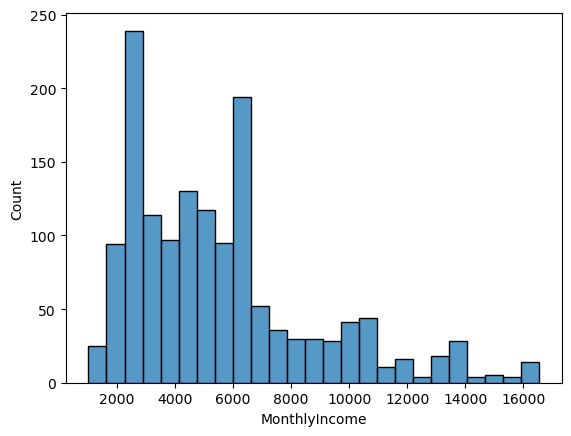

In [53]:
import seaborn as sns
sns.histplot(df['MonthlyIncome'])

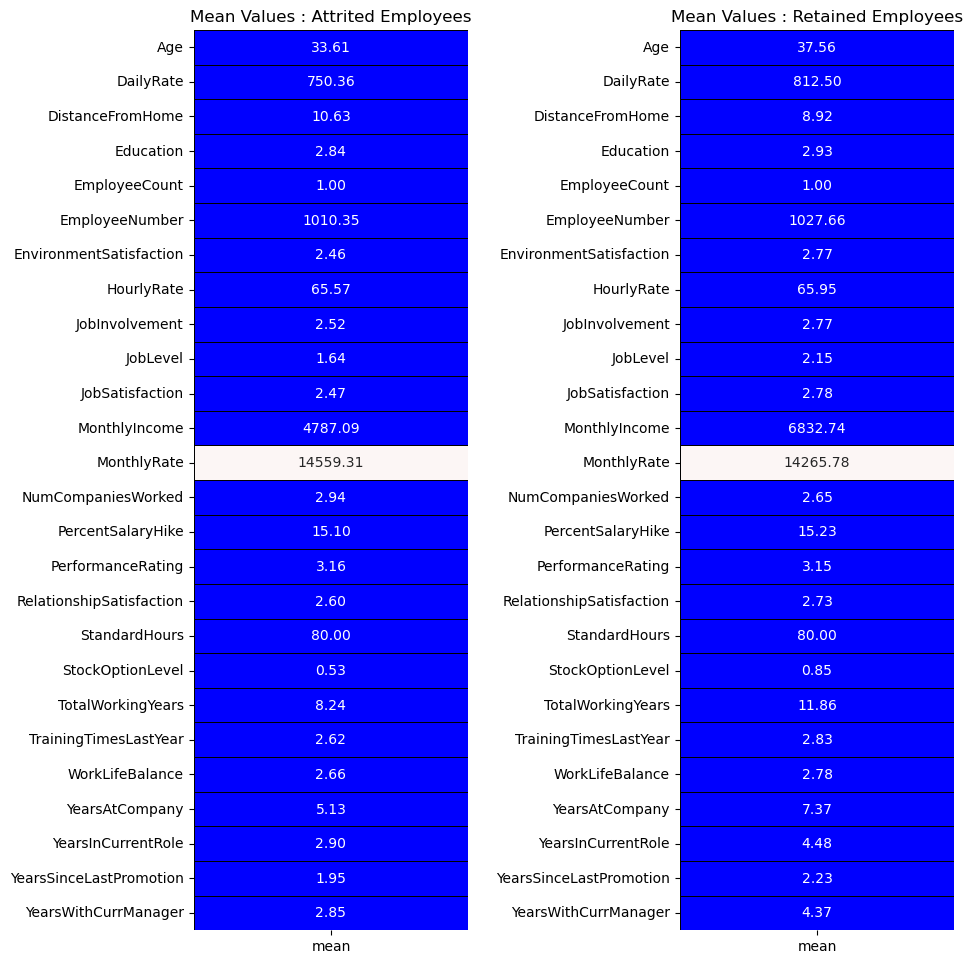

In [54]:
yes = data[data['Attrition'] == 'Yes'].describe().T
no = data[data['Attrition'] == 'No'].describe().T

colors = ['#0000FF','#FCF6F5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Retained Employees');

fig.tight_layout(pad = 2)

Categorical variable


<Axes: xlabel='Department', ylabel='count'>

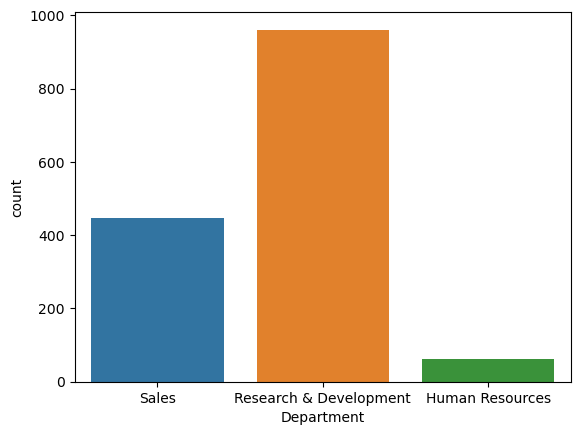

In [55]:
sns.countplot(x='Department', data=df)

<Axes: xlabel='Gender', ylabel='Count'>

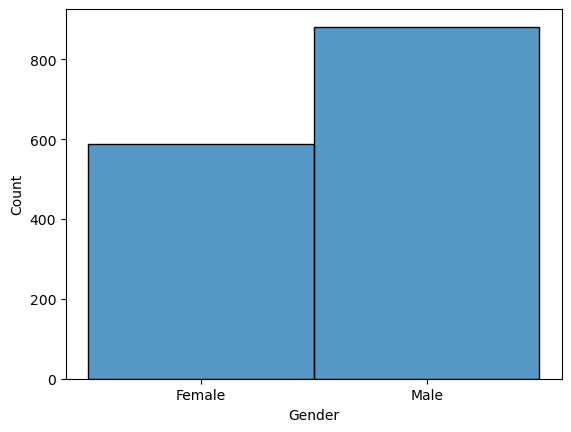

In [56]:
sns.histplot(df['Gender'])


In [57]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Z_Score,MonthlyIncome_scale,MonthlyIncome_log
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,-0.108350,-0.108350,8.698347
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,-0.291719,-0.291719,8.542861
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,-0.937654,-0.937654,7.644919
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,-0.763634,-0.763634,7.975565
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,-0.644858,-0.644858,8.151333


## 2) Bivariate Analysis (Two Variables)


Numerical vs Numerical

<Axes: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

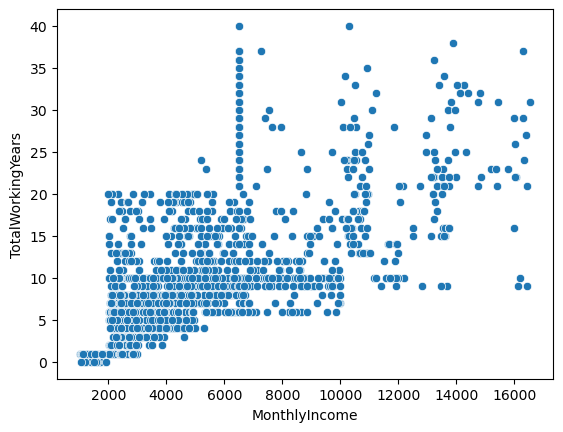

In [58]:
sns.scatterplot(x='MonthlyIncome', y='TotalWorkingYears', data=df)

<Axes: xlabel='MonthlyIncome', ylabel='PerformanceRating'>

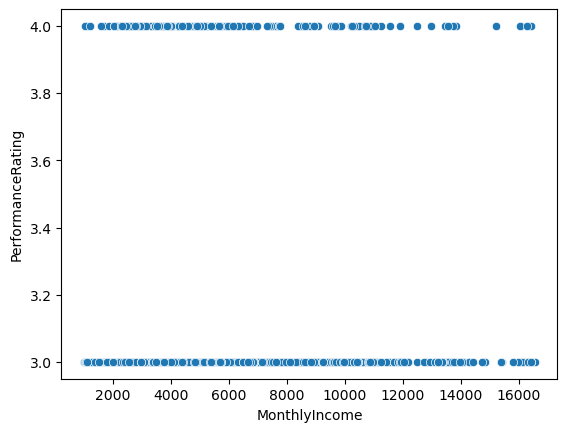

In [59]:
sns.scatterplot(x='MonthlyIncome', y='PerformanceRating', data=df)

Numerical vs Categorical


<Axes: xlabel='Department', ylabel='MonthlyIncome'>

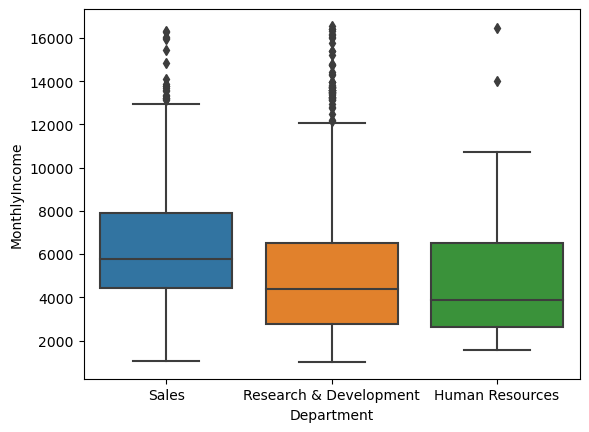

In [60]:
sns.boxplot(x='Department', y='MonthlyIncome', data=df)

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

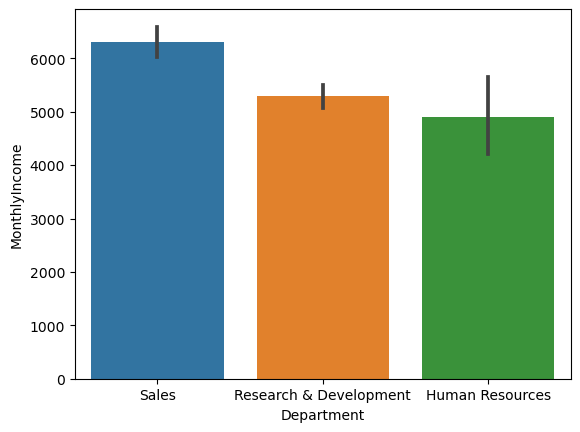

In [61]:
sns.barplot(x='Department', y='MonthlyIncome', data=df)

Categorical vs. Categorical:


In [62]:
pd.crosstab(df['Gender'], df['Department'])

Department,Human Resources,Research & Development,Sales
Gender,,,
Female,20,379,189
Male,43,582,257


## 3) Hypothesis Generation

How is attrition dependent on Age?

In [64]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Age vs. Counts of People in an Organization')

Is income the main factor towards employee attrition?


In [65]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

Observation

* As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly

Does the Department of work impact attrition?


In [66]:
dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

In [67]:
dept_att

,Department,Attrition,Counts
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [68]:
import plotly.express as px
import pandas as pd

# Assuming dept_att is already created
dept_att = data.groupby(['Department', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Calculate total counts per department
dept_totals = dept_att.groupby('Department')['Counts'].transform('sum')

# Calculate percentage
dept_att['Percentage'] = (dept_att['Counts'] / dept_totals) * 100

# Create the bar chart with percentage labels
fig = px.bar(dept_att, 
             x='Department', 
             y='Counts', 
             color='Attrition', 
             title='Department-wise Counts of People in an Organization', 
             text=dept_att['Percentage'].apply(lambda x: f'{x:.1f}%'))  # Add percentage labels

# Show the figure
fig.show()

How does the environment satisfaction impact attrition?

In [69]:
sats_att=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

Observation

* In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

Does company stocks for employees impact attrition?¶


In [70]:
stock_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

How does Work Life Balance impact the overall attrition rates?


In [71]:
wlb_att=data.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

How does work experience affect attrition?


In [72]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

How does Work duration in current role impact Attrition?


In [74]:
yrscr_att=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

Does Hike percentage impact Attrition?
* PercentSalaryHike: PERCENTAGE INCREASE IN SALARY


In [75]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

Are managers a reason of people resigning??


In [76]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

## Prediction


Correlation Matrix


<Axes: >

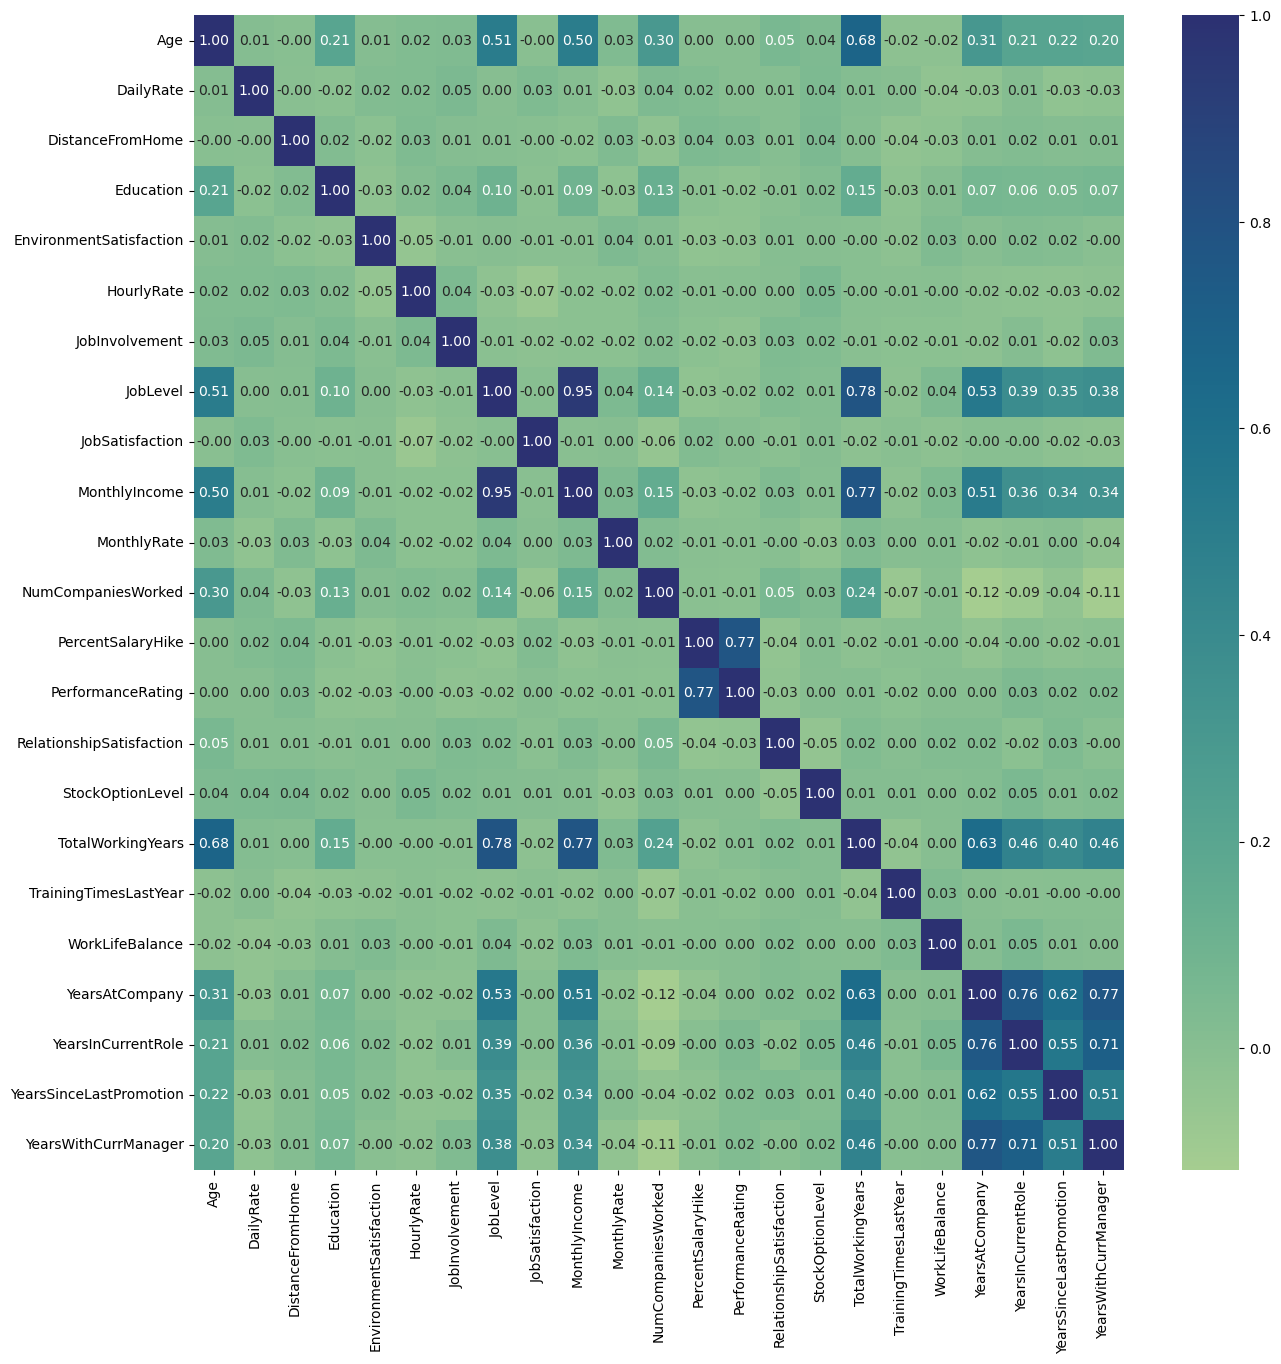

In [77]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',#'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='crest') #viridis

In [78]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', #'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

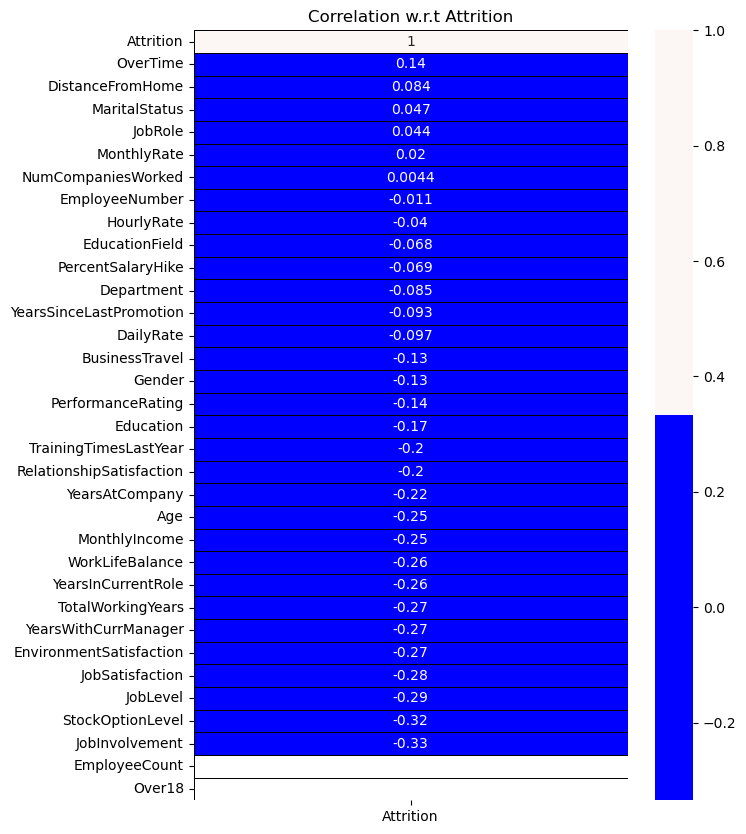

In [79]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');


## Prediction


In [80]:
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

# log_reg=LogisticRegression(C=1000,max_iter=10000)
# log_reg.fit(x_train,y_train)
# print('--------------------------------------------------------------------------')
# print('Logistic Regression:')
# print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(x_train,y_train)))
# print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(x_test,y_test)))
# print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.856
Test Model accruracy scores: 0.853
--------------------------------------------------------------------------


In [81]:
data_dummies=pd.get_dummies(data)
features=data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
X=features.values
y=data_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.895
Test Model accruracy scores: 0.894
--------------------------------------------------------------------------
